# Analyse de Balzac par NLP

## Introduction au corpus

On veut structurer nos textes de manière propre. Pour ce faire, on va utiliser un tableau panda

In [96]:
import pandas as pd
import numpy as np
import os
pd.options.display.float_format = "{:,.2f}".format
nb = 3 + len(os.listdir("./sources/vie_parisienne/"))
texts = pd.DataFrame({"title":["empty" for i in range(nb)], "text":["empty" for i in range(nb)]})

On définit ensuite comment importer un texte

In [35]:
def import_text(i, url):
    f = open(url, "r", encoding="utf8")
    texts.loc[i] = [url.split("/")[-1].split(".txt")[0], " ".join(f.read().split("\n"))]
    f.close()

Puis on importe tous les textes

In [36]:
import_text(0, "./sources/EG.txt")
import_text(1, "./sources/UM.txt")
i = 2
for text in os.listdir("./sources/vie_parisienne/"):
    import_text(i, "./sources/vie_parisienne/" + text)
    i += 1
texts

,title,text
0,EG,Il se trouve dans certaines provinces des mais...
1,UM,"En entrant à Nemours du côté de Paris, on pass..."
2,CeBi1,"Durant les nuits d’hiver, le bruit ne cesse da..."
3,CeBi2,"Huit jours après cette fête, dernière flammèch..."
4,CoBe1,Première partie Le père prodigue Vers le milie...
5,CoBe2,"Quand, après avoir reconduit la baronne, Wence..."
6,CP1,"Vers trois heures de l’après-midi, dans le moi..."
7,CP2,L’avilissement des mots est une de ces bizarre...
8,CS,"Léon de Lora, notre célèbre peintre de paysage..."
9,DL,Il existe dans une ville espagnole située sur ...


## Analyse avec Spacy

On souhaite d'abord analyser les textes en utilisant spacy. On importe donc la librairie

In [10]:
from tqdm import tqdm
import spacy
nlp = spacy.load("fr_dep_news_trf")

On peut ainsi analyser le premier texte, Eugénie Grandet. 

In [9]:
doc = nlp(texts["text"][0])

Le document qu'on récupère est une liste de tokens ayant divers attributs:

In [54]:
for token in doc[:5]:
    print("Mot: " + token.text + "\nLemme: " + token.lemma_ + "\nNature: " + token.pos_ + "\nAnalyse morphologique: " + str(token.morph) + "\n-------------------------")

Mot: Il
Lemme: il
Nature: PRON
Analyse morphologique: Gender=Masc|Number=Sing|Person=3
-------------------------
Mot: se
Lemme: se
Nature: PRON
Analyse morphologique: Person=3|Reflex=Yes
-------------------------
Mot: trouve
Lemme: trouver
Nature: VERB
Analyse morphologique: Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin
-------------------------
Mot: dans
Lemme: dans
Nature: ADP
Analyse morphologique: 
-------------------------
Mot: certaines
Lemme: certain
Nature: DET
Analyse morphologique: Gender=Fem|Number=Plur
-------------------------


On souhaite enregistrer ainsi le document de chaque texte dans le tableau panda. Pour cela, nous devons vérifier que la taille des textes ne dépasse pas la limite

In [37]:
texts.insert(2, "length", [len(texts["text"][i]) for i in range(len(texts))])

In [38]:
texts

,title,text,length
0,EG,Il se trouve dans certaines provinces des mais...,376298
1,UM,"En entrant à Nemours du côté de Paris, on pass...",478726
2,CeBi1,"Durant les nuits d’hiver, le bruit ne cesse da...",319369
3,CeBi2,"Huit jours après cette fête, dernière flammèch...",284710
4,CoBe1,Première partie Le père prodigue Vers le milie...,478333
5,CoBe2,"Quand, après avoir reconduit la baronne, Wence...",388331
6,CP1,"Vers trois heures de l’après-midi, dans le moi...",333473
7,CP2,L’avilissement des mots est une de ces bizarre...,293933
8,CS,"Léon de Lora, notre célèbre peintre de paysage...",119990
9,DL,Il existe dans une ville espagnole située sur ...,303267


In [39]:
nlp.max_length = 10 + max(texts["length"])

In [8]:
from time import time

analysis = []
_time = time()
for i in range(len(texts)):
    analysis.append(nlp(texts["text"][i]))
    dtime = time() - _time
    print("Analysed " + texts["title"][i] + ", time taken: " + str(dtime) + "s.")
    _time = time()

texts.insert(2, "doc", analysis)

Analysed EG, time taken: 255.03121948242188s.
Analysed UM, time taken: 363.6420269012451s.
Analysed CeBi1, time taken: 217.19300889968872s.
Analysed CeBi2, time taken: 245.814062833786s.
Analysed CoBe1, time taken: 369.74119210243225s.
Analysed CoBe2, time taken: 291.5948872566223s.
Analysed CP1, time taken: 264.3212401866913s.
Analysed CP2, time taken: 256.83123207092285s.
Analysed CS, time taken: 111.04172229766846s.
Analysed DL, time taken: 214.8923180103302s.
Analysed EHC, time taken: 356.7729947566986s.
Analysed Em, time taken: 459.73572278022766s.
Analysed FC, time taken: 31.054413080215454s.
Analysed Fe, time taken: 282.8783917427063s.
Analysed FYO, time taken: 160.5045268535614s.
Analysed G2, time taken: 21.322838068008423s.
Analysed IG, time taken: 84.695481300354s.
Analysed MN, time taken: 161.1243438720703s.
Analysed PeBo, time taken: 405.35764813423157s.
Analysed PG, time taken: 46.12586045265198s.
Analysed PrBo, time taken: 80.58746910095215s.
Analysed Sa, time taken: 76.1

In [137]:
texts

,title,text,doc,length
0,EG,Il se trouve dans certaines provinces des mais...,"(Il, se, trouve, dans, certaines, provinces, d...",376298
1,UM,"En entrant à Nemours du côté de Paris, on pass...","(En, entrant, à, Nemours, du, côté, de, Paris,...",478726
2,CeBi1,"Durant les nuits d’hiver, le bruit ne cesse da...","(Durant, les, nuits, d’, hiver, ,, le, bruit, ...",319369
3,CeBi2,"Huit jours après cette fête, dernière flammèch...","(Huit, jours, après, cette, fête, ,, dernière,...",284710
4,CoBe1,Première partie Le père prodigue Vers le milie...,"(Première, partie, Le, père, prodigue, Vers, l...",478333
5,CoBe2,"Quand, après avoir reconduit la baronne, Wence...","(Quand, ,, après, avoir, reconduit, la, baronn...",388331
6,CP1,"Vers trois heures de l’après-midi, dans le moi...","(Vers, trois, heures, de, l’, après-midi, ,, d...",333473
7,CP2,L’avilissement des mots est une de ces bizarre...,"(L’, avilissement, des, mots, est, une, de, ce...",293933
8,CS,"Léon de Lora, notre célèbre peintre de paysage...","(Léon, de, Lora, ,, notre, célèbre, peintre, d...",119990
9,DL,Il existe dans une ville espagnole située sur ...,"(Il, existe, dans, une, ville, espagnole, situ...",303267


## Comptage de mots

Regardons déjà les mots intéressants dans le texte. On souhaite enlever les mots dont la nature nous intéresse peu, et ne garder que leur lemme, pour pouvoir les compter. On utilise donc un Counter de python. On compte aussi les POS par intérêt pour le corpus.

In [148]:
from collections import Counter

uninteresting = ['PRON','CCONJ','PART','DET','ADP','SPACE', 'NUM', 'SYM', "SCONJ", "INTJ", "AUX", "PUNCT"]
lemmas = Counter()
pos = Counter()
for token in doc:
    if token.pos_ not in uninteresting:
        lemmas.update([token.lemma_])
        pos.update([token.pos_])

In [149]:
lemmas.most_common()[:20]

[('dire', 609),
 ('ne', 548),
 ('Grandet', 508),
 ('avoir', 439),
 ('pas', 439),
 ('Eugénie', 352),
 ('n’', 335),
 ('faire', 325),
 ('tout', 300),
 ('bien', 298),
 ('plus', 292),
 ('Monsieur', 263),
 ('aller', 251),
 ('père', 242),
 ('monsieur', 219),
 ('voir', 217),
 ('pouvoir', 213),
 ('Nanon', 212),
 ('Charles', 204),
 ('être', 188)]

In [150]:
pos.most_common()

[('NOUN', 13250),
 ('VERB', 9887),
 ('ADV', 4514),
 ('ADJ', 3568),
 ('PROPN', 2301),
 ('X', 20)]

De cette manière, on peut regarder manuellement les 100 mots les plus fréquents dans Eugénie Grandet et Ursule Mirouët, pour voir lesquels peuvent nous intéresser le plus. 

In [151]:
def get_counter(index):
    lemmas = Counter()
    for token in texts["doc"][index]:
        if token.pos_ not in uninteresting:
            lemmas.update([token.lemma_])
    return lemmas

In [234]:
get_counter(0).most_common()[:20]

[('dire', 609),
 ('ne', 548),
 ('Grandet', 508),
 ('avoir', 439),
 ('pas', 439),
 ('Eugénie', 352),
 ('n’', 335),
 ('faire', 325),
 ('tout', 300),
 ('bien', 298),
 ('plus', 292),
 ('Monsieur', 263),
 ('aller', 251),
 ('père', 242),
 ('monsieur', 219),
 ('voir', 217),
 ('pouvoir', 213),
 ('Nanon', 212),
 ('Charles', 204),
 ('être', 188)]

In [235]:
get_counter(1).most_common()[:20]

[('dire', 734),
 ('ne', 665),
 ('avoir', 516),
 ('pas', 491),
 ('Ursule', 489),
 ('faire', 409),
 ('Minoret', 385),
 ('plus', 342),
 ('tout', 336),
 ('n’', 331),
 ('voir', 302),
 ('docteur', 295),
 ('pouvoir', 293),
 ('Savinien', 244),
 ('aller', 241),
 ('bien', 235),
 ('être', 222),
 ('vouloir', 217),
 ('petit', 216),
 ('Monsieur', 206)]

A partir de là, on forme plusieurs dictionnaires organisés en différents axes de comparaison

In [356]:
parole = ["dire", "répondre", "entendre", "demander", "mot", "voix", "lettre", 
          "parole", "écrier", "bavard", "écrire", "inscription", "rumeur"]
age = ["vieux", "jeune", "vieillard"]
argent = ["argent", "or", "pièce", "riche", "pauvre", "héritier", "héritage"]
passivité = ["entendre", "regarder", "voir", "parler", "regard", "paraître", "reconnaître", "sourire", "penser"]
silence = ["secret", "silence", "taire", "muet", "silencieux", "doucement"]
religion = ["mort", "magnétisme", "âme", "Dieu", "église", "prier", "rêve"]
féminin = ["fille", "mère", "mademoiselle", "dame"]
connaissance = ["penser", "intérêt", "pensée", "connaître", "savoir", "idée", "apprendre"]
sentiment = ["cœur", "amour", "sentiment", "enfant", "aimer"]
temps = ["moment", "heure", "toujours", "jamais", "temps", "mois", "année", "jour", "minute"]
désir = ["désir", "désirer", "vouloir"]
influence = ["ami", "monde"]
privé = ["maison", "porte", "seul", "chambre", "fenêtre"]
patriarcat = ["père", "homme", "famille", "fort", "fils", "maître", "cousin"]
musique = ["musique", "piano"]
social = ["bourgeois"]

On souhaite alors compter les mots dans chaque oeuvre, puis en déduire une fréquence à agréger dans les scènes de la vie parisiennes pour les comparer à Ursule Mirouët et Eugénie Grandet. 

Définissons donc des fonctions pour faire tout ça

In [324]:
import matplotlib

In [326]:
from math import floor

def count(dic, pondere = False, *agreg):
    # agreg: list of lists [old_term, new_term]
    
    # Initialization
    def agreg_filter(word):
        for x in agreg: 
            if x[0] == word:
                return False
        return True
    dic = list(filter(agreg_filter, dic))
    index_labels = ["Eugénie Grandet", "Ursule Mirouët", "Vie parisienne"]
    df = {}
    nb_vp = len(texts) - 3
    for word in dic: 
        df[word] = []
    df["total"] = []
                       
    # EG and UM
    EG_counter = get_counter(0)
    EG_len = sum(EG_counter.values())
    EG_num = 0
    UM_counter = get_counter(1)
    UM_len = sum(UM_counter.values())
    UM_num = 0
    for word in dic:
        if word in EG_counter.keys():
            df[word].append(EG_counter[word] / EG_len)
            EG_num += EG_counter[word]
        else:
            df[word].append(0)
        if word in UM_counter.keys():
            df[word].append(UM_counter[word] / UM_len)
            UM_num += UM_counter[word]
        else:
            df[word].append(0)
        for pair in agreg:
            if pair[1] == word:
                if pair[0] in EG_counter.keys():
                    df[word][0] += EG_counter[pair[0]] / EG_len
                    EG_num += EG_counter[pair[0]]
                if pair[0] in UM_counter.keys():
                    df[word][1] += UM_counter[pair[0]] / UM_len
                    UM_num += UM_counter[pair[0]]
    df["total"].append(EG_num / EG_len)
    df["total"].append(UM_num / UM_len)
    
    # Vie parisienne
    for word in dic: 
        df[word] += [0, 0, -1, -1]
    df["total"] += [0, 0, -1, -1]  
    length_vp = 0
    for i in range(2, len(texts)-1): 
        _counter = get_counter(i)
        _len = sum(_counter.values())
        length_vp += _len
        _num = 0
        for word in dic:
            local_count = 0
            if word in _counter.keys():
                df[word][2] += _counter[word] / _len / nb_vp
                df[word][3] += _counter[word]
                local_count += _counter[word]
            for pair in agreg:
                if pair[1] == word and pair[0] in _counter.keys():
                    df[word][2] += _counter[pair[0]] / _len / nb_vp
                    df[word][3] += _counter[pair[0]]
                    local_count += _counter[pair[0]]
            _num += local_count
            if df[word][4] == -1 or df[word][4] > local_count / _len:
                df[word][4] = local_count / _len
            if df[word][5] == -1 or df[word][5] < local_count / _len:
                df[word][5] = local_count / _len
        df["total"][2] += _num / _len / nb_vp
        df["total"][3] += _num
        if df["total"][4] == -1 or df["total"][4] > _num / _len:
            df["total"][4] = _num / _len
        if df["total"][5] == -1 or df["total"][5] < _num / _len:
            df["total"][5] = _num / _len
    
    # Normalization
    for word in dic:
        df[word][3] /= length_vp
    df["total"][3] /= length_vp
    
    for word in dic: 
        for i in range(4):
            fact = 1
            if df[word][5] == 0:
                df[word][5] = max(df[word][0], df[word][1])
                if df[word][5] == 0: 
                    df[word][5] = 1
            elif df[word][5] == df[word][4]:
                df[word][4] = 0
            df[word][i] = floor(((df[word][i] - df[word][4]) / (df[word][5] - df[word][4])) * 100) / 100
        df[word] = df[word][:-2]
        if pondere: 
            df[word] = [df[word][0], df[word][1], df[word][3]]
        else:
            df[word] = df[word][:-1]
    for i in range(4):
        df["total"][i] = floor(((df["total"][i] - df["total"][4]) / (df["total"][5] - df["total"][4])) * 100) / 100
    df["total"] = df["total"][:-2]
    if pondere: 
        df["total"] = [df["total"][0], df["total"][1], df["total"][3]]
    else:
        df["total"] = df["total"][:-1]
       
    return pd.DataFrame(df, index=index_labels)

In [327]:
count(parole)

,dire,répondre,entendre,demander,mot,voix,lettre,parole,écrier,bavard,écrire,inscription,rumeur,total
Eugénie Grandet,0.55,0.44,0.71,0.12,0.20,0.22,0.44,0.53,0.30,0.00,0.21,0.29,0.00,0.57
Ursule Mirouët,0.51,0.64,0.37,0.24,0.13,0.20,0.72,0.47,0.61,0.19,0.46,2.20,0.20,0.65
Vie parisienne,0.45,0.35,0.32,0.28,0.25,0.15,0.38,0.36,0.47,0.29,0.31,0.20,0.09,0.47


In [219]:
count(age)

,vieux,jeune,vieillard,total
Eugénie Grandet,0.94,0.45,0.07,0.56
Ursule Mirouët,1.20,0.53,0.75,0.94
Vie parisienne,0.42,0.38,0.20,0.39


In [220]:
count(argent, True)

,argent,or,pièce,riche,pauvre,héritier,héritage,total
Eugénie Grandet,0.68,0.32,0.37,0.23,0.63,0.47,0.12,0.48
Ursule Mirouët,0.35,0.01,0.08,0.29,0.41,1.51,0.69,0.30
Vie parisienne,0.43,0.05,0.21,0.11,0.51,0.11,0.15,0.19


In [300]:
count(passivité, False, ["regard", "regarder"])

,entendre,regarder,voir,parler,paraître,reconnaître,sourire,penser,total
Eugénie Grandet,0.71,0.77,0.52,0.29,0.48,-0.04,0.27,1.02,0.75
Ursule Mirouët,0.37,0.63,0.68,0.37,0.56,0.43,0.57,0.82,0.78
Vie parisienne,0.33,0.53,0.47,0.39,0.49,0.38,0.38,0.49,0.47


In [288]:
count(silence, False, ["silencieux", "silence"])

,secret,silence,taire,muet,doucement,total
Eugénie Grandet,0.40,0.48,0.59,1.27,0.64,0.59
Ursule Mirouët,0.34,0.36,0.15,0.07,0.51,0.30
Vie parisienne,0.39,0.31,0.33,0.32,0.36,0.36


In [223]:
count(religion)

,mort,magnétisme,âme,Dieu,église,prier,rêve,total
Eugénie Grandet,0.32,0.00,0.40,0.43,0.40,0.39,0.04,0.50
Ursule Mirouët,0.42,1.38,0.48,1.08,1.25,1.19,0.43,1.00
Vie parisienne,0.29,0.14,0.32,0.31,0.39,0.46,0.15,0.45


In [224]:
count(féminin)

,fille,mère,mademoiselle,dame,total
Eugénie Grandet,0.93,1.54,0.91,0.22,1.25
Ursule Mirouët,0.46,0.92,0.49,0.46,0.70
Vie parisienne,0.34,0.37,0.24,0.22,0.34


In [225]:
count(connaissance, True)

,penser,intérêt,pensée,connaître,savoir,idée,apprendre,total
Eugénie Grandet,1.02,0.83,0.53,0.47,0.42,0.15,0.68,0.74
Ursule Mirouët,0.82,0.59,0.46,0.37,0.43,0.22,0.93,0.66
Vie parisienne,0.50,0.42,0.30,0.66,0.43,0.16,0.52,0.47


In [226]:
count(sentiment)

,cœur,amour,sentiment,enfant,aimer,total
Eugénie Grandet,0.61,0.31,0.52,0.46,0.23,0.43
Ursule Mirouët,0.47,0.20,0.32,0.69,0.37,0.41
Vie parisienne,0.42,0.27,0.28,0.33,0.40,0.36


In [227]:
count(temps)

,moment,heure,toujours,jamais,temps,mois,année,jour,minute,total
Eugénie Grandet,0.50,0.43,0.50,0.38,0.56,0.53,0.81,0.50,0.02,0.65
Ursule Mirouët,0.29,0.28,0.40,0.33,0.53,0.37,0.51,0.35,0.13,0.30
Vie parisienne,0.31,0.52,0.53,0.38,0.50,0.37,0.30,0.36,0.20,0.41


In [228]:
count(désir)

,désir,désirer,vouloir,total
Eugénie Grandet,0.22,0.41,0.71,0.66
Ursule Mirouët,0.19,0.23,0.71,0.64
Vie parisienne,0.28,0.39,0.58,0.56


In [37]:
count(influence)

,ami,monde,total
,,,
Eugénie Grandet,0.28,0.08,0.18
Ursule Mirouët,0.39,0.12,0.27
Vie parisienne,0.41,0.17,0.32


In [230]:
count(privé)

,maison,porte,seul,chambre,fenêtre,total
Eugénie Grandet,0.62,1.03,0.57,0.65,0.49,1.11
Ursule Mirouët,0.50,0.09,0.52,0.40,0.94,0.64
Vie parisienne,0.39,0.44,0.45,0.50,0.29,0.61


In [231]:
count(patriarcat)

,père,homme,famille,fort,fils,maître,cousin,total
Eugénie Grandet,2.00,0.01,0.23,0.42,0.45,0.73,0.81,1.26
Ursule Mirouët,0.32,0.08,0.15,0.14,1.61,1.09,0.14,0.63
Vie parisienne,0.29,0.37,0.17,0.38,0.35,0.28,0.12,0.47


In [232]:
count(musique, True)

,musique,piano,total
Eugénie Grandet,0.00,0.00,0.00
Ursule Mirouët,0.42,0.47,0.67
Vie parisienne,0.18,0.09,0.23


## Comptage de la ponctuation

Procédons de même pour la ponctuation

In [154]:
def punct_counter(index):
    puncts = Counter()
    for token in texts["doc"][index]:
        if token.pos_ == "PUNCT":
            puncts.update([token.lemma_])
    return puncts

In [163]:
punct_counter(0).most_common()

[(',', 6069),
 ('.', 2970),
 ('–', 1013),
 ('!', 453),
 ('?', 393),
 (';', 329),
 ('...', 247),
 (':', 173),
 ('....', 23),
 ('«', 22),
 ('�', 20),
 ('»', 20),
 ('(', 10),
 (')', 10),
 ('..', 4),
 ('-', 2)]

On peut ensuite réappliquer la fonction d'au dessus pour la ponctuation

In [361]:
dic = ["...", "…", ",", ".", "–", "!", "?", ";", ":", "etc."]

# Initialization
index_labels = ["Eugénie Grandet", "Ursule Mirouët", "Vie parisienne"]
df = {}
nb_vp = len(texts) - 3
for word in dic: 
    df[word] = []
                   
# EG and UM
EG_counter = punct_counter(0)
EG_len = sum(EG_counter.values())
UM_counter = punct_counter(1)
UM_len = sum(UM_counter.values())
for word in dic:
    if word in EG_counter.keys():
        df[word].append(EG_counter[word] / EG_len)
    else:
        df[word].append(0)
    if word in UM_counter.keys():
        df[word].append(UM_counter[word] / UM_len)
    else:
        df[word].append(0)

# Vie parisienne
for word in dic: 
    df[word] += [0, 0, -1, -1]
length_vp = 0
for i in range(2, len(texts)-1): 
    _counter = punct_counter(i)
    _len = sum(_counter.values())
    length_vp += _len
    for word in dic:
        if word in _counter.keys():
            df[word][2] += _counter[word] / _len / nb_vp
            df[word][3] += _counter[word]
            if df[word][4] == -1 or df[word][4] > _counter[word] / _len:
                df[word][4] = _counter[word] / _len
            if df[word][5] == -1 or df[word][5] < _counter[word] / _len:
                df[word][5] = _counter[word] / _len
        else:
            df[word][4] = 0
            if df[word][5] == -1:
                df[word][5] = 0
    
# Aggregation
df["…"][0] += df["..."][0]
df["…"][1] += df["..."][1]
df["…"][2] += df["..."][2]
df["…"][3] += df["..."][3]
if df["…"][4] > df["..."][4]: df["…"][4] = df["..."][4]
if df["…"][5] < df["..."][5]: df["…"][5] = df["..."][5]
del df["..."]

# Normalization
for word in dic[1:]:
    df[word][3] /= length_vp
    
for word in dic[1:]: 
    for i in range(4):
        fact = 1
        if df[word][5] == 0:
            df[word][5] = max(df[word][0], df[word][1])
            if df[word][5] == 0: 
                df[word][5] = 1
        elif df[word][5] == df[word][4]:
            df[word][4] = 0
        df[word][i] = floor(((df[word][i] - df[word][4]) / (df[word][5] - df[word][4])) * 100) / 100
    df[word] = df[word][:-3]
punctable_freqpunct = pd.DataFrame(df, index=index_labels)

In [362]:
punctable_freqpunct

,…,",",.,–,!,?,;,:,etc.
Eugénie Grandet,0.25,0.50,0.75,0.71,0.12,0.78,0.12,0.45,0.00
Ursule Mirouët,0.13,0.52,0.76,0.00,0.10,0.75,0.19,0.66,0.10
Vie parisienne,0.38,0.59,0.47,0.55,0.33,0.51,0.23,0.44,0.19


On peut aussi établir l'indice en fonction du nombre de mots intéressants:

In [363]:
dic = ["...", "…", ",", ".", "–", "!", "?", ";", ":", "etc."]

# Initialization
index_labels = ["Eugénie Grandet", "Ursule Mirouët", "Vie parisienne"]
df = {}
nb_vp = len(texts) - 3
for word in dic: 
    df[word] = []
                   
# EG and UM
EG_counter = punct_counter(0)
EG_len = sum(get_counter(0).values())
UM_counter = punct_counter(1)
UM_len = sum(get_counter(1).values())
for word in dic:
    if word in EG_counter.keys():
        df[word].append(EG_counter[word] / EG_len)
    else:
        df[word].append(0)
    if word in UM_counter.keys():
        df[word].append(UM_counter[word] / UM_len)
    else:
        df[word].append(0)

# Vie parisienne
for word in dic: 
    df[word] += [0, 0, -1, -1]
length_vp = 0
for i in range(2, len(texts)-1): 
    _counter = punct_counter(i)
    _len = sum(get_counter(i).values())
    length_vp += _len
    for word in dic:
        if word in _counter.keys():
            df[word][2] += _counter[word] / _len / nb_vp
            df[word][3] += _counter[word]
            if df[word][4] == -1 or df[word][4] > _counter[word] / _len:
                df[word][4] = _counter[word] / _len
            if df[word][5] == -1 or df[word][5] < _counter[word] / _len:
                df[word][5] = _counter[word] / _len
        else:
            df[word][4] = 0
            if df[word][5] == -1:
                df[word][5] = 0
    
# Aggregation
df["…"][0] += df["..."][0]
df["…"][1] += df["..."][1]
df["…"][2] += df["..."][2]
df["…"][3] += df["..."][3]
if df["…"][4] > df["..."][4]: df["…"][4] = df["..."][4]
if df["…"][5] < df["..."][5]: df["…"][5] = df["..."][5]
del df["..."]

# Normalization
for word in dic[1:]:
    df[word][3] /= length_vp
    
for word in dic[1:]: 
    for i in range(4):
        fact = 1
        if df[word][5] == 0:
            df[word][5] = max(df[word][0], df[word][1])
            if df[word][5] == 0: 
                df[word][5] = 1
        elif df[word][5] == df[word][4]:
            df[word][4] = 0
        df[word][i] = floor(((df[word][i] - df[word][4]) / (df[word][5] - df[word][4])) * 100) / 100
    df[word] = df[word][:-3]
punctable_freqword = pd.DataFrame(df, index=index_labels)

In [364]:
punctable_freqword

,…,",",.,–,!,?,;,:,etc.
Eugénie Grandet,0.24,0.45,0.99,0.64,0.14,0.69,0.16,0.47,0.00
Ursule Mirouët,0.10,-0.01,0.55,0.00,0.06,0.49,0.15,0.54,0.08
Vie parisienne,0.36,0.38,0.49,0.48,0.30,0.43,0.26,0.42,0.18


Il y a de manière générale peu de différence entre les deux manières de calculer l'indice. Cependant, pour les signes de ponctuation très utilisés (".", ","), la différence est notable, en particulier pour l'indice de Ursule Mirouët qui se retrouve écrasé. 

## Sauvegarde et restauration

A ce point là, on souhaite pouvoir redémarrer le kernel sans répéter toutes les opération précédentes. On veut donc sauvegarder les tableaux au format CSV. 

In [336]:
def save_csv(df, name):
    df.to_csv("./csv/" + name + ".csv")

In [337]:
save_csv(count(parole), "parole")

On veut de même pouvoir récupérer ces données.

In [3]:
def get_csv(name):
    df = pd.read_csv("./csv/" + name + ".csv")
    return df.set_index(df["Unnamed: 0"].rename("")).drop("Unnamed: 0", axis=1)

In [4]:
parole = get_csv("parole")
parole

,dire,répondre,entendre,demander,mot,voix,lettre,parole,écrier,bavard,écrire,inscription,rumeur,total
,,,,,,,,,,,,,,
Eugénie Grandet,0.55,0.44,0.71,0.12,0.20,0.22,0.44,0.53,0.30,0.00,0.21,0.29,0.00,0.57
Ursule Mirouët,0.51,0.64,0.37,0.24,0.13,0.20,0.72,0.47,0.61,0.19,0.46,2.20,0.20,0.65
Vie parisienne,0.43,0.34,0.33,0.26,0.28,0.16,0.35,0.35,0.45,0.23,0.33,0.18,0.08,0.45


In [357]:
count(parole)

,dire,répondre,entendre,demander,mot,voix,lettre,parole,écrier,bavard,écrire,inscription,rumeur,total
Eugénie Grandet,0.55,0.44,0.71,0.12,0.20,0.22,0.44,0.53,0.30,0.00,0.21,0.29,0.00,0.57
Ursule Mirouët,0.51,0.64,0.37,0.24,0.13,0.20,0.72,0.47,0.61,0.19,0.46,2.20,0.20,0.65
Vie parisienne,0.43,0.34,0.33,0.26,0.28,0.16,0.35,0.35,0.45,0.23,0.33,0.18,0.08,0.45


On voit que rien n'a changé. On itère donc ces opérations pour tous les tableaux

In [367]:
save_csv(count(parole), "parole")
save_csv(count(age), "age")
save_csv(count(connaissance, True), "connaissance")
save_csv(count(argent, True), "argent")
save_csv(count(passivité, False, ["regard", "regarder"]), "passivite")
save_csv(count(silence, False, ["silencieux", "silence"]), "silence")
save_csv(count(religion), "religion")
save_csv(count(féminin), "feminin")
save_csv(count(sentiment), "sentiment")
save_csv(count(temps), "temps")
save_csv(count(influence), "influence")
save_csv(count(désir), "desir")
save_csv(count(privé), "prive")
save_csv(count(patriarcat), "patriarcat")
save_csv(count(musique, True), "musique")
save_csv(count(social), "social")

In [1]:
import pandas as pd
import numpy as np

In [17]:
parole = get_csv("parole")
age = get_csv("age")
connaissance = get_csv("connaissance")
argent = get_csv("argent")
passivité = get_csv("passivite")
silence = get_csv("silence")
religion = get_csv("religion")
féminin = get_csv("feminin")
sentiment = get_csv("sentiment")
temps = get_csv("temps")
influence = get_csv("influence")
désir = get_csv("desir")
privé = get_csv("prive")
patriarcat = get_csv("patriarcat")
musique = get_csv("musique")
social = get_csv("social")

## Affichage joli

On aimerait résumer joliment tous les nombres intéressants en graphiques

On peut d'abord mettre de la couleur et un titre aux tableaux. 

In [40]:
import matplotlib
def pretty_table(table, name):
    def make_pretty(styler):
        styler.set_caption("Comparaison d'apparitions " + name)
        styler.format(precision=2, decimal=",") 
        styler.background_gradient(axis=None, vmax = 1, cmap="YlGn")
        return styler
    return table.style.pipe(make_pretty)

In [41]:
pretty_table(silence, "du silence")

,secret,silence,taire,muet,doucement,total
,,,,,,
Eugénie Grandet,"0,40","0,48","0,59","1,27","0,64","0,59"
Ursule Mirouët,"0,34","0,36","0,15","0,07","0,51","0,30"
Vie parisienne,"0,39","0,31","0,33","0,32","0,36","0,36"


In [42]:
pretty_table(féminin, "des personnages féminins")

,fille,mère,mademoiselle,dame,total
,,,,,
Eugénie Grandet,"0,93","1,54","0,91","0,22","1,25"
Ursule Mirouët,"0,46","0,92","0,49","0,46","0,70"
Vie parisienne,"0,34","0,37","0,24","0,22","0,34"


Ensuite, nous pouvons montrer de manière graphique les nombres, avec des graphes en barre. 

In [6]:
from matplotlib import pyplot as plt
def plot_bar(column, name, mini, maxi):
    fig, ax = plt.subplots()
    ax.bar(['Eugénie Grandet', 'Ursule Mirouët', 'Vie parisienne'], list(column),
           width = 0.8, color=["darkorchid", "forestgreen", "silver"])
    ax.set_ylabel('indice', fontsize = 10)
    ax.set_title("Comparaison " + name, fontsize = 15)
    ax.set_ylim([mini, maxi])
    plt.show()

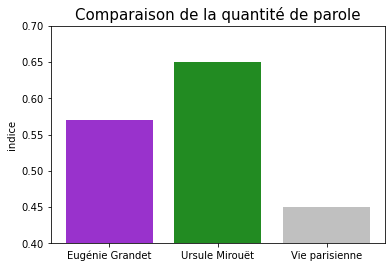

In [7]:
plot_bar(parole["total"], "de la quantité de parole", 0.4, 0.7)

On souhaite sauvegarder les figures ainsi obtenues.

In [132]:
def save_plot(column, name, mini, maxi, docname, size = 15, EG=True):
    fig, ax = plt.subplots()
    if EG:
        ax.bar(['Eugénie Grandet', 'Ursule Mirouët', 'Vie parisienne'], list(column),
            width = 0.8, color=["darkorchid", "forestgreen", "silver"])
    else:
        ax.bar(['Ursule Mirouët', 'Vie parisienne'], list(column)[1:],
            width = 0.8, color=["forestgreen", "silver"])
    ax.set_ylabel('indice', fontsize = 10)
    ax.set_title("Comparaison " + name, fontsize = size)
    ax.set_ylim([mini, maxi])
    plt.savefig("./fig/" + docname + ".png", transparent = True, dpi = 300)

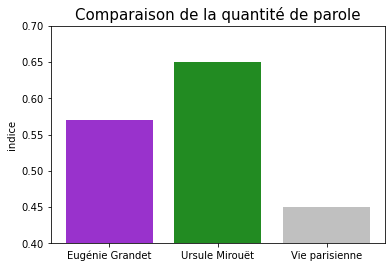

In [67]:
save_plot(parole["total"], "de la quantité de parole", 0.4, 0.7, "parole")

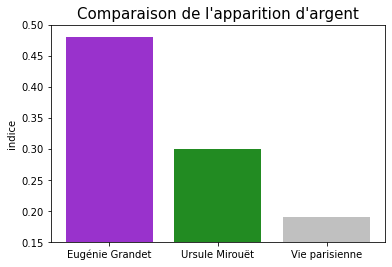

In [25]:
save_plot(argent["total"], "de l'apparition d'argent", 0.15, 0.5, "argent")

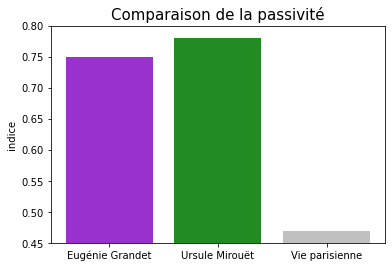

In [27]:
save_plot(passivité["total"], "de la passivité", 0.45, 0.8, "passivité")

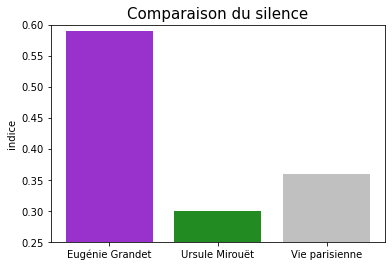

In [156]:
save_plot(silence["total"], "du silence", 0.25, 0.6, "silence")

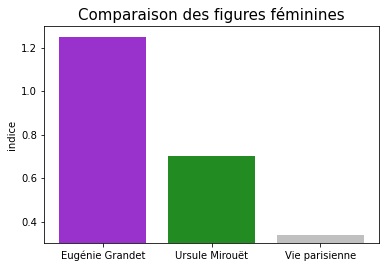

In [34]:
save_plot(féminin["total"], "des figures féminines", 0.3, 1.3, "feminin")

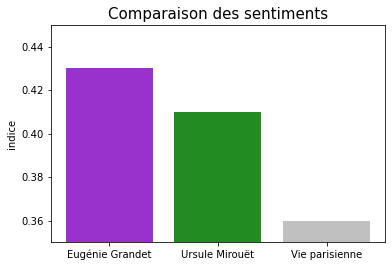

In [36]:
save_plot(sentiment["total"], "des sentiments", 0.35, 0.45, "sentiment")

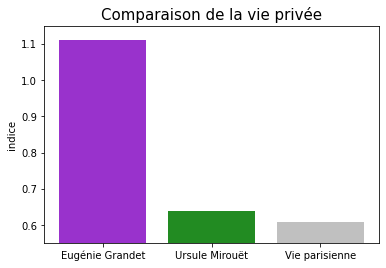

In [40]:
save_plot(privé["total"], "de la vie privée", 0.55, 1.15, "prive")

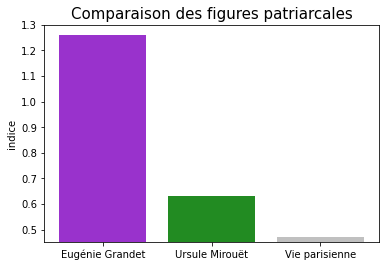

In [47]:
save_plot(patriarcat["total"], "des figures patriarcales", 0.45, 1.3, "patriarcat")

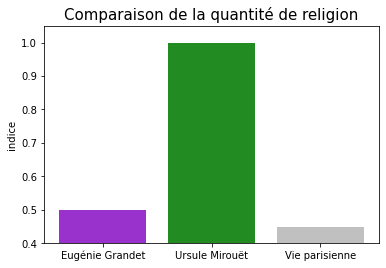

In [140]:
save_plot(religion["total"], "de la quantité de religion", 0.4, 1.05, "religion")

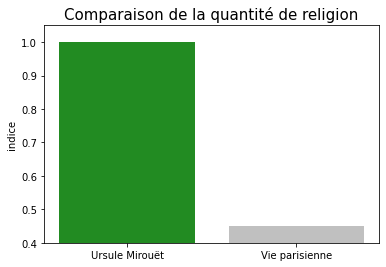

In [139]:
save_plot(religion["total"], "de la quantité de religion", 0.4, 1.05, "religion2", 15, False)

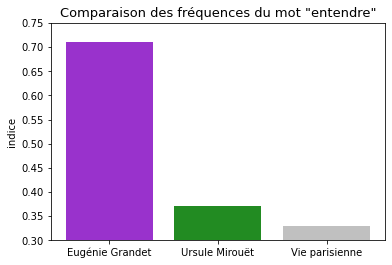

In [71]:
save_plot(parole["entendre"], 'des fréquences du mot "entendre"', 0.3, 0.75, "entendre", 13)

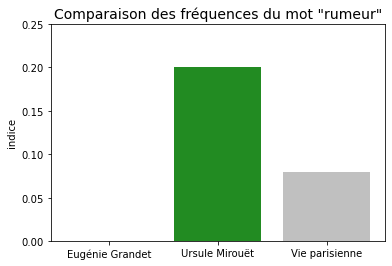

In [74]:
save_plot(parole["rumeur"], 'des fréquences du mot "rumeur"', 0, 0.25, "rumeur", 14)

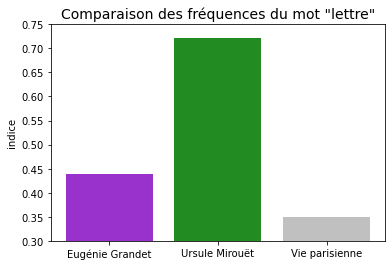

In [77]:
save_plot(parole["lettre"], 'des fréquences du mot "lettre"', 0.3, 0.75, "lettre", 14)

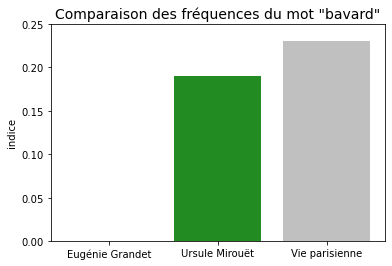

In [97]:
save_plot(parole["bavard"], 'des fréquences du mot "bavard"', 0, 0.25, "bavard", 14)

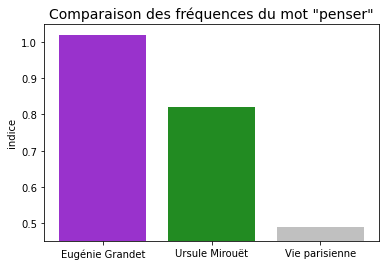

In [96]:
save_plot(passivité["penser"], 'des fréquences du mot "penser"', 0.45, 1.05, "penser", 14)

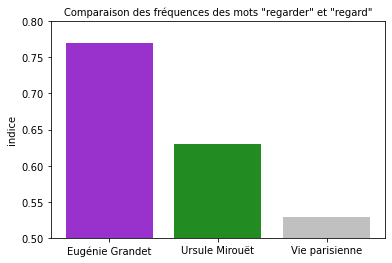

In [90]:
save_plot(passivité["regarder"], 'des fréquences des mots "regarder" et "regard"', 0.5, 0.8, "regarder", 10)

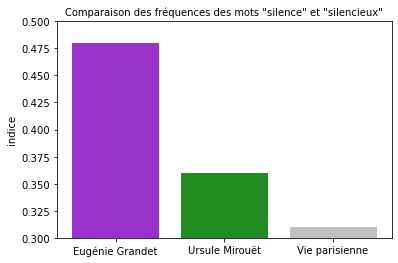

In [155]:
save_plot(silence["silence"], 'des fréquences des mots "silence" et "silencieux"', 0.3, 0.5, "silencieux", 10)

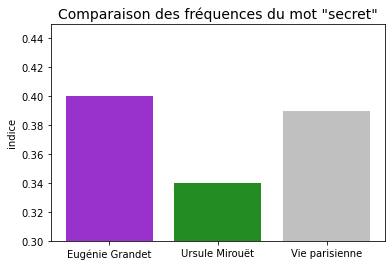

In [100]:
save_plot(silence["secret"], 'des fréquences du mot "secret"', 0.3, 0.45, "secret", 14)

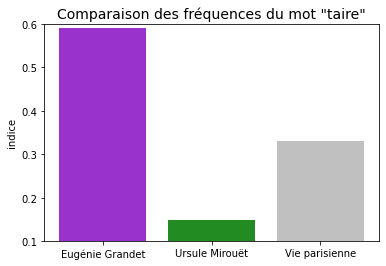

In [105]:
save_plot(silence["taire"], 'des fréquences du mot "taire"', 0.1, 0.6, "taire", 14)

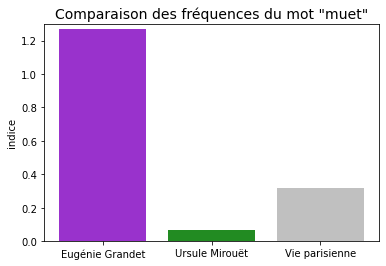

In [113]:
save_plot(silence["muet"], 'des fréquences du mot "muet"', 0, 1.3, "muet", 14)

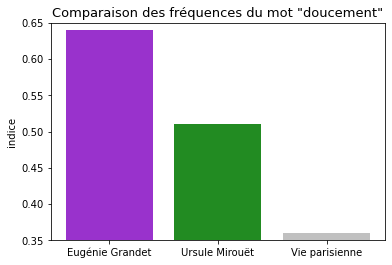

In [115]:
save_plot(silence["doucement"], 'des fréquences du mot "doucement"', 0.35, 0.65, "doucement", 13)

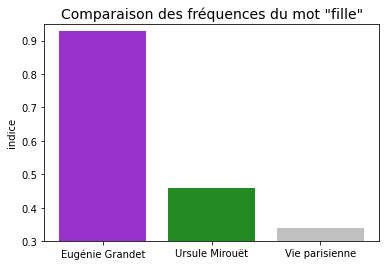

In [120]:
save_plot(féminin["fille"], 'des fréquences du mot "fille"', 0.3, 0.95, "fille", 14)

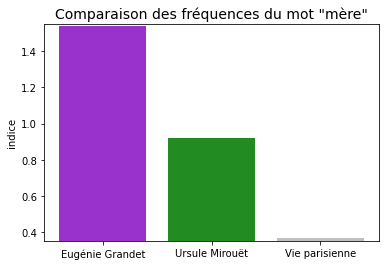

In [145]:
save_plot(féminin["mère"], 'des fréquences du mot "mère"', 0.35, 1.55, "mere", 14)

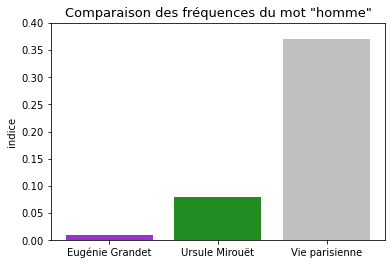

In [147]:
save_plot(patriarcat["homme"], 'des fréquences du mot "homme"', 0, 0.4, "homme", 13)

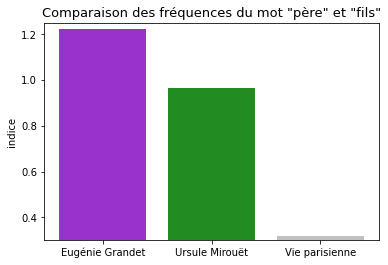

In [154]:
save_plot((patriarcat["père"] + patriarcat["fils"])/2, 'des fréquences du mot "père" et "fils"', 0.3, 1.25, "pere", 13)